I'll quickly remind you what I did. My long-term objective is to create a questionnaire which aims to carry out a sort of psycho-socio-demographic survey of autistic people by being able to have enough variables to reveal subgroups.

For this study I obtained 118 responses (notably because it was very long, more than 30 minutes and there are quite a few redundancies in certain dimensions, but it was mainly for exploration).

I have already coded everything and calculated all the dimensions on the excel document. On the other hand, I removed all the answers on identification with characters from films and series because it was an open question so I was not able to code the answers (I should rather make a check mark question for the next time I think, and calculate identification %).

You have a folder with each scale (there is the French file and I added the English file) if you want to take a look at what it corresponds to:
https://drive.google.com/drive/folders/1Kqt4BfI2T4FTdP7oaAToIz8o54fwLLg1?usp=sharing

You will see that I have explained the coding of each variable at the bottom of the answers for information purposes and I have also added lines at the top to explain the sub-variables (so you must delete these lines from the doc that you will use to make the analyzes).

For my part, after coding I have already tried several types of analyzes (Pearson correlation and ANOVA in particular) and there are some interesting things that stand out, but as it is the first time that I have done this type of analysis I'm not sure I've really covered everything that could be done.

Ultimately, if there are interesting results I would like to be able to publish the paper (and I can potentially include you in it if you are interested). 🙂


I had quite a few hypotheses when doing this questionnaire, including a main one about how autistic people will conceptualize autism. If the person has a poor quality of life and/or poor self-esteem and/or a weak sense of agency etc. then they will be more likely to feel disabled, to not associate strengths and abilities with autism etc. .. and conversely if the person has a good quality of life, and/or good esteem and/or a strong sense of agency etc, then they will have a greater chance of not feeling disabled, of associating of strengths and abilities to autism etc... and ultimately to identify with stereotypes of characters from different films and series (which have + or - autonomy, + or - difficulty).... And all this to ultimately discuss the subjectivity of the perception of autism and its autism, which in fact depends on many factors except the real cognitive characteristics of autism (which can be analyzed in a neutral way without saying that it's about strengths or weaknesses, just differences)

And at the same time I also wanted to see if we could identify elements linked to all of this in relation to socio-demographic variables (age, sex, sexual orientation, political ideology, level of education, etc.)



### OBJECTIVES

* Find how everything is correlated
* What factors contribute to feeling disabled and having negative views of autism


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

from scipy.stats import chi2_contingency
import statsmodels.stats.multicomp as multi

from itertools import combinations
import warnings

In [2]:
raw = pd.read_csv(r"C:\Users\leann\OneDrive\Desktop\autism_study\all_scores_no_header.csv")

# Set option to display all columns
pd.set_option('display.max_columns', None)

raw = raw.iloc[:118]

In [3]:
raw.head()

,Sex,Gender,Sexual orientation,Age,Nationality,Education,Politics,Activism,Country,Socioprofesional categories,ASD Diagnosis,Other diagnosis,Disability,With ASD,With Asperger syndrome,With Kanner autism,Autistic person,Autist,Asperger,Person affecting from autism,person carrying autism,Person with Autism,Person suffering of autism,Person living with autism,Other,"Neurodivergent, neuroatypical and/or neurodiverse",Persistence/Tenacity and sense of personal effectiveness,Emotional/cognitive control under pressure,Ability to bounce back,Contrôle/sens,Spirituality,Agentivity,Esteem,Extraversion,Agreability,Conscientiousness,Neuroticism,Openess,Positive difference,Changeability,Context Dependent,Spectrum Abilities,Social model,Personal/Medical model,Denial of continuing discrimination,Antagonism toward demands,Resentment about special favors,Life productivity,Psychological health,Life outlook,Relationships,Autism Stigma,Autism Identity,Autism Separability
0,2,2,2,3,2,3,4,2,2,8,1,1,1,2,2,2,1,1,2,2,2,2,2,2,2,1,26.0,18.0,13.0,3.0,5.0,22.0,25.0,20.5,38.0,35.0,35.0,45.0,18.0,7.0,19.0,15.0,28.0,17.0,6.0,7.0,3.0,30.0,8.0,28.0,8.0,67.0,42.0,16.0
1,2,2,2,5,1,4,4,2,1,5,2,1,3,2,2,2,2,2,1,2,2,2,2,2,2,1,36.0,16.0,18.0,5.0,4.0,22.0,17.0,14.5,39.0,40.0,36.0,46.0,34.0,9.0,18.0,19.0,31.0,26.0,6.0,7.0,3.0,33.0,7.0,24.0,11.0,59.0,36.0,12.0
2,2,2,1,3,1,4,1,2,1,8,2,1,1,2,2,2,1,1,2,2,2,2,2,2,2,1,27.0,26.0,22.0,5.0,10.0,25.0,21.0,16.0,36.0,28.0,36.0,48.0,19.0,11.0,24.0,17.0,26.0,24.0,6.0,7.0,3.0,14.0,8.0,23.0,9.0,48.0,32.0,13.0
3,2,2,2,3,2,2,2,1,2,7,2,1,2,2,2,2,1,2,2,2,2,2,2,2,2,1,34.0,22.0,14.0,12.0,6.0,29.0,35.0,15.5,31.0,37.0,29.0,36.0,18.0,14.0,14.0,15.0,31.0,16.0,6.0,9.0,3.0,35.0,16.0,30.0,13.0,63.0,37.0,14.0
4,2,3,2,4,1,3,4,2,1,8,1,1,1,2,2,2,2,1,2,2,2,2,2,2,2,1,25.0,22.0,12.0,4.0,6.0,11.0,19.0,20.5,39.0,27.0,34.0,36.0,21.0,11.0,20.0,10.0,34.0,21.0,6.0,8.0,3.0,26.0,6.0,33.0,10.0,61.0,37.0,14.0


In [4]:
raw.describe()

,Persistence/Tenacity and sense of personal effectiveness,Emotional/cognitive control under pressure,Ability to bounce back,Contrôle/sens,Spirituality,Agentivity,Esteem,Extraversion,Agreability,Conscientiousness,Neuroticism,Openess,Positive difference,Changeability,Context Dependent,Spectrum Abilities,Social model,Personal/Medical model,Denial of continuing discrimination,Antagonism toward demands,Resentment about special favors,Life productivity,Psychological health,Life outlook,Relationships,Autism Stigma,Autism Identity,Autism Separability
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,27.500000,20.830508,16.025424,7.949153,5.245763,22.084746,25.508475,18.843220,35.567797,31.398305,32.677966,38.669492,19.466102,10.186441,22.483051,12.627119,28.618644,22.067797,8.042373,10.313559,4.389831,27.262712,11.118644,23.805085,12.067797,60.694915,36.355932,12.737288
std,5.486191,4.624914,3.687498,2.821915,2.385628,5.940699,6.531640,5.256945,6.554804,5.792922,5.058430,7.575326,5.377513,2.528298,7.343505,4.181352,3.702435,5.106940,1.794550,2.337722,1.046230,7.031587,3.675210,5.785715,3.416223,6.863141,4.100293,2.859765
min,11.000000,8.000000,7.000000,3.000000,2.000000,10.000000,11.000000,10.500000,16.000000,13.000000,18.000000,16.000000,7.000000,4.000000,7.000000,5.000000,7.000000,8.000000,6.000000,7.000000,3.000000,11.000000,6.000000,7.000000,5.000000,35.000000,22.000000,5.000000
25%,24.250000,18.000000,14.000000,6.000000,3.250000,18.000000,21.000000,15.500000,31.000000,28.250000,29.000000,34.000000,16.000000,8.000000,17.000000,10.000000,27.000000,19.000000,6.000000,8.000000,4.000000,22.000000,9.000000,20.000000,10.000000,56.250000,34.000000,11.000000
50%,28.000000,21.000000,16.000000,8.000000,5.000000,21.000000,26.000000,18.500000,37.000000,32.000000,33.000000,40.500000,19.000000,10.000000,21.500000,12.000000,29.000000,23.000000,8.000000,10.000000,4.000000,26.000000,10.500000,23.000000,12.000000,62.000000,37.000000,13.000000
75%,31.000000,24.000000,18.000000,10.000000,7.000000,27.750000,31.000000,22.500000,40.000000,35.750000,37.000000,45.000000,23.000000,12.000000,28.750000,15.000000,31.000000,25.000000,10.000000,12.000000,5.000000,31.750000,13.000000,27.000000,15.000000,66.000000,40.000000,15.000000
max,40.000000,32.000000,25.000000,15.000000,10.000000,36.000000,39.000000,37.500000,48.000000,45.000000,40.000000,50.000000,34.000000,15.000000,35.000000,25.000000,35.000000,36.000000,12.000000,18.000000,8.000000,50.000000,23.000000,35.000000,25.000000,70.000000,42.000000,16.000000


In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 54 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Sex                                                       118 non-null    object 
 1   Gender                                                    118 non-null    object 
 2   Sexual orientation                                        118 non-null    object 
 3   Age                                                       118 non-null    object 
 4   Nationality                                               118 non-null    object 
 5   Education                                                 118 non-null    object 
 6   Politics                                                  118 non-null    object 
 7   Activism                                                  118 non-null    object 
 8   Country             

### change categories

In [6]:
raw_object_cols = raw.select_dtypes(['object']).columns
raw[raw_object_cols] = raw[raw_object_cols].astype('category')

raw_float_cols = raw.select_dtypes(['float']).columns
raw[raw_float_cols] = raw[raw_float_cols].astype('int')

In [8]:
raw.head()

,Sex,Gender,Sexual orientation,Age,Nationality,Education,Politics,Activism,Country,Socioprofesional categories,ASD Diagnosis,Other diagnosis,Disability,With ASD,With Asperger syndrome,With Kanner autism,Autistic person,Autist,Asperger,Person affecting from autism,person carrying autism,Person with Autism,Person suffering of autism,Person living with autism,Other,"Neurodivergent, neuroatypical and/or neurodiverse",Persistence/Tenacity and sense of personal effectiveness,Emotional/cognitive control under pressure,Ability to bounce back,Contrôle/sens,Spirituality,Agentivity,Esteem,Extraversion,Agreability,Conscientiousness,Neuroticism,Openess,Positive difference,Changeability,Context Dependent,Spectrum Abilities,Social model,Personal/Medical model,Denial of continuing discrimination,Antagonism toward demands,Resentment about special favors,Life productivity,Psychological health,Life outlook,Relationships,Autism Stigma,Autism Identity,Autism Separability
0,2,2,2,3,2,3,4,2,2,8,1,1,1,2,2,2,1,1,2,2,2,2,2,2,2,1,26,18,13,3,5,22,25,20,38,35,35,45,18,7,19,15,28,17,6,7,3,30,8,28,8,67,42,16
1,2,2,2,5,1,4,4,2,1,5,2,1,3,2,2,2,2,2,1,2,2,2,2,2,2,1,36,16,18,5,4,22,17,14,39,40,36,46,34,9,18,19,31,26,6,7,3,33,7,24,11,59,36,12
2,2,2,1,3,1,4,1,2,1,8,2,1,1,2,2,2,1,1,2,2,2,2,2,2,2,1,27,26,22,5,10,25,21,16,36,28,36,48,19,11,24,17,26,24,6,7,3,14,8,23,9,48,32,13
3,2,2,2,3,2,2,2,1,2,7,2,1,2,2,2,2,1,2,2,2,2,2,2,2,2,1,34,22,14,12,6,29,35,15,31,37,29,36,18,14,14,15,31,16,6,9,3,35,16,30,13,63,37,14
4,2,3,2,4,1,3,4,2,1,8,1,1,1,2,2,2,2,1,2,2,2,2,2,2,2,1,25,22,12,4,6,11,19,20,39,27,34,36,21,11,20,10,34,21,6,8,3,26,6,33,10,61,37,14


### Change Some Features to Binary

Not sure if I'll do this, but here's a list

In [17]:
cols_to_binary = ['Sexual orientation', 'Nationality', 'Activism', 'Other diagnosis', 
                  'With Asperger syndrome', 'With Kanner autism', 'Autistic person', 
                  'Autist', 'Asperger', 'Person affecting from autism', 
                  'person carrying autism', 'Person with Autism', 
                  'Person suffering of autism', 'Person living with autism', 'Other', 
                  'Neurodivergent, neuroatypical and/or neurodiverse']


## Visualizations of distributions

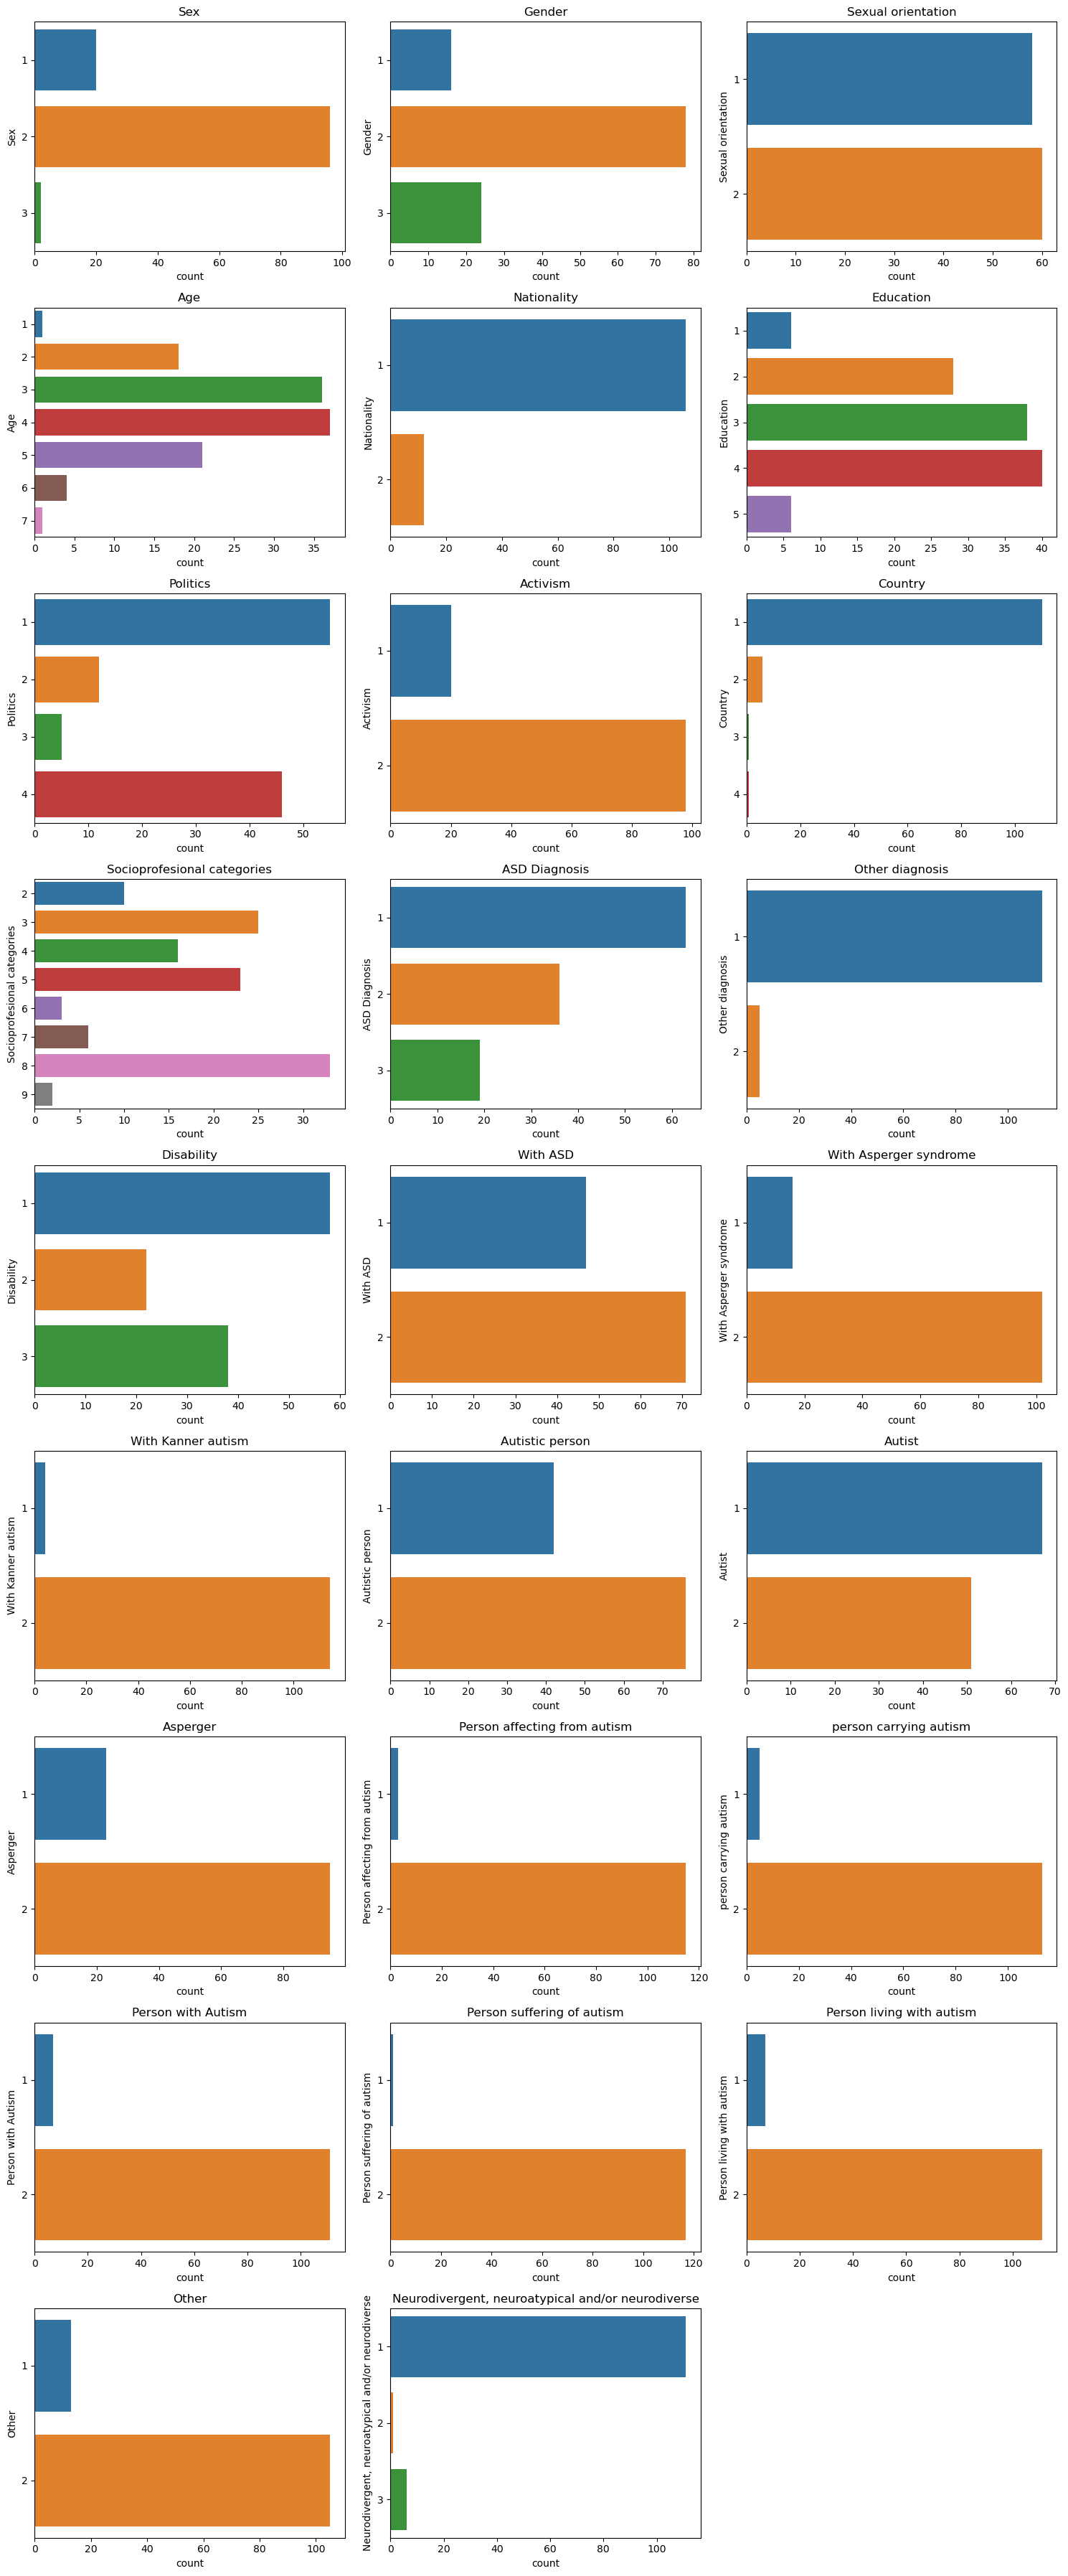

In [57]:

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)
categorical_features = raw.select_dtypes(['category']).columns

n_rows = len(categorical_features) // 3 + (len(categorical_features) % 3 > 0)
n_cols = 3

plt.figure(figsize=(15, n_rows * 4))  # Adjust the figure size as needed

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(y=raw[feature])
    plt.title(feature)
    plt.tight_layout()

plt.show()


## CORRELATIONS

I will calculate the pearson coefficient between continous variables as well as the p value. 

In [21]:

continuous_cols = [col for col in raw.columns if pd.api.types.is_numeric_dtype(raw[col])]
continuous_data = raw[continuous_cols]

corr_matrix_con= continuous_data.corr()

corr_flat = corr_matrix_con.unstack().reset_index()

corr_flat.columns = ['Variable1', 'Variable2', 'Correlation']

corr_flat = corr_flat[corr_flat['Variable1'] != corr_flat['Variable2']]
corr_flat = corr_flat[corr_flat['Variable1'] < corr_flat['Variable2']]

corr_flat = corr_flat.iloc[corr_flat['Correlation'].abs().argsort()[::-1]]

# Function to calculate p-value, handling non-numeric data and missing values
def calculate_p_value(row, df):
    try:
        x = df[row['Variable1']].dropna()
        y = df[row['Variable2']].dropna()
        if x.empty or y.empty:
            return pd.NA
        if not (x.dtype.kind in 'biufc' and y.dtype.kind in 'biufc'):
            return pd.NA
        return stats.pearsonr(x, y)[1]
    except Exception as e:
        return pd.NA

# Apply function
corr_flat['P-value'] = corr_flat.apply(calculate_p_value, axis=1, df=raw)


,Variable1,Variable2,Correlation,P-value
550,Antagonism toward demands,Denial of continuing discrimination,0.720065,3.971551e-20
141,Agentivity,Emotional/cognitive control under pressure,0.701703,8.705699e-19
140,Agentivity,Persistence/Tenacity and sense of personal eff...,0.661642,3.455918e-16
61,Ability to bounce back,Agentivity,0.646399,2.667475e-15
57,Ability to bounce back,Emotional/cognitive control under pressure,0.634727,1.181808e-14
...,...,...,...,...
165,Agentivity,Autism Stigma,0.002736,9.765435e-01
508,Denial of continuing discrimination,Spirituality,-0.002453,9.789658e-01
687,Relationships,Spectrum Abilities,0.002383,9.795660e-01
272,Conscientiousness,Resentment about special favors,-0.000454,9.961058e-01


In [27]:
corr_flat.head()

,Variable1,Variable2,Correlation,P-value
550,Antagonism toward demands,Denial of continuing discrimination,0.720065,3.971551e-20
141,Agentivity,Emotional/cognitive control under pressure,0.701703,8.705699e-19
140,Agentivity,Persistence/Tenacity and sense of personal eff...,0.661642,3.455918e-16
61,Ability to bounce back,Agentivity,0.646399,2.667475e-15
57,Ability to bounce back,Emotional/cognitive control under pressure,0.634727,1.181808e-14


QUESTION: What range of pearson coefficients are worth looking at?

In [30]:
# Filter to include only pairs with p-values less than 0.05 and correlation > 0.29 
# Chose 0.29 as correlation over this amount is generally considered moderately correlated.

significant_corrs = corr_flat[(corr_flat['P-value'] < 0.05) & (corr_flat['Correlation'] > 0.29)]

# Sort these significant pairs by the absolute value of the correlation coefficient
significant_corrs = significant_corrs.iloc[significant_corrs['Correlation'].abs().argsort()[::-1]]

significant_corrs


,Variable1,Variable2,Correlation,P-value
550,Antagonism toward demands,Denial of continuing discrimination,0.720065,3.971551e-20
141,Agentivity,Emotional/cognitive control under pressure,0.701703,8.705699e-19
140,Agentivity,Persistence/Tenacity and sense of personal eff...,0.661642,3.455918e-16
61,Ability to bounce back,Agentivity,0.646399,2.667475e-15
57,Ability to bounce back,Emotional/cognitive control under pressure,0.634727,1.181808e-14
56,Ability to bounce back,Persistence/Tenacity and sense of personal eff...,0.576481,8.422791e-12
252,Conscientiousness,Persistence/Tenacity and sense of personal eff...,0.575115,9.676323e-12
28,Emotional/cognitive control under pressure,Persistence/Tenacity and sense of personal eff...,0.553785,7.792885e-11
755,Autism Identity,Autism Separability,0.550345,1.076152e-10
552,Antagonism toward demands,Resentment about special favors,0.543673,1.992024e-10


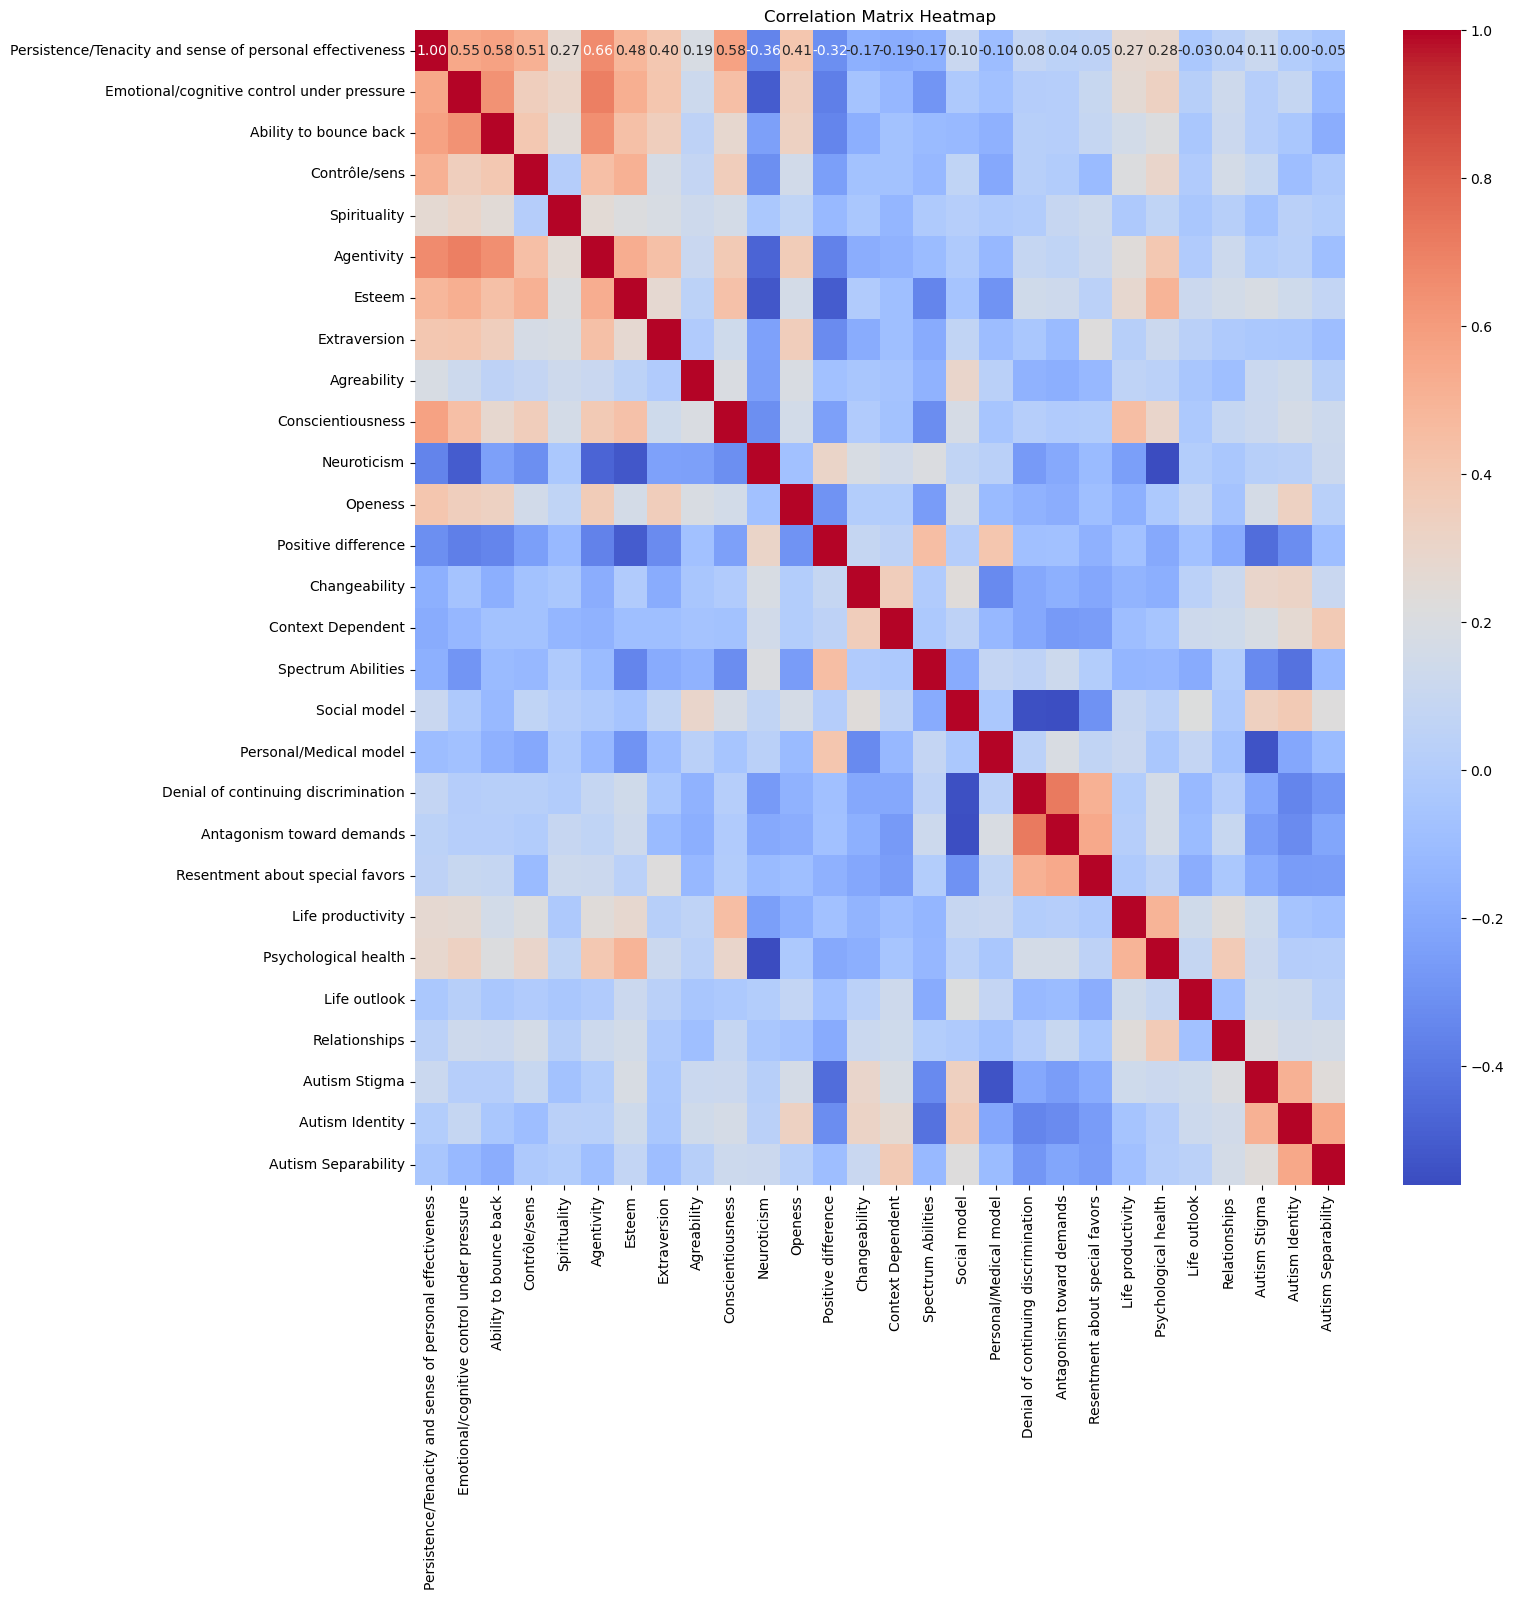

In [25]:
# Create a heat map

plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix_con, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

## Chi Squared Test

Used to determine if there is a significant association between two categorical variables. I am interested in seeing how the other categorical features are associated with 'Disability'

In [14]:
categorical_features = [col for col in raw.columns if raw[col].dtype == 'category' and col != 'Disability']

chi_squared_results = []

# Perform Chi-squared tests
for feature in categorical_features:
    contingency_table = pd.crosstab(raw['Disability'], raw[feature])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_squared_results.append({'Feature': feature, 'Chi2': chi2, 'p-value': p})


results_df = pd.DataFrame(chi_squared_results)

sorted_results_df = results_df.sort_values(by='p-value')

sorted_results_df


,Feature,Chi2,p-value
16,Autist,7.143162,0.028111
10,ASD Diagnosis,9.640931,0.046931
22,Person living with autism,5.584044,0.061297
9,Socioprofesional categories,22.736098,0.064702
12,With ASD,4.363669,0.112834
5,Education,10.991461,0.202184
11,Other diagnosis,3.083641,0.213991
6,Politics,8.024761,0.236295
20,Person with Autism,2.884630,0.236380
24,"Neurodivergent, neuroatypical and/or neurodiverse",5.348728,0.253350


Notes: Only 2 features are significantly correlated with 'Disability', 'Autist' and 'ASD Diagnosis'. However, 'Person Living with Autism' and 'Socioprofesional Categories' have a p-value just above the threshold for statistically significant, and it would be worth looking into these further as well. 

tegorical variables.

### Post-Hoc Tests for Chi-Squared: Adjusted Residuals Analysis 
Analysis of adjusted residuals, as residuals that are significantly large indicate categories contributing most to the Chi-squared statistic. 
 
Adjusted residuals in a contingency table help determine which cells contribute most to the overall Chi-squared statistic. Residuals greater than +/- 2 are typically considered significant.

In [44]:
def adjusted_residuals(observed, expected):
    resid = (observed - expected) / np.sqrt(expected)
    return resid * np.sqrt((len(observed) - 1) / len(observed))

# 'Autist' 
observed = pd.crosstab(raw['Disability'], raw['Autist'])
chi2, p, dof, expected = stats.chi2_contingency(observed, correction=False)
residuals = adjusted_residuals(observed, expected)

print("Adjusted Residuals for 'Autist':")
print(residuals)
print('\n')

# 'ASD Diagnosis'

observed = pd.crosstab(raw['Disability'], raw['ASD Diagnosis'])
chi2, p, dof, expected = stats.chi2_contingency(observed, correction=False)
residuals = adjusted_residuals(observed, expected)

print("Adjusted Residuals for 'ASD Diagnosis':")
print(residuals)

print('\n')

# 'Person living with autism'
observed = pd.crosstab(raw['Disability'], raw['Person living with autism'])
chi2, p, dof, expected = stats.chi2_contingency(observed, correction=False)
residuals = adjusted_residuals(observed, expected)

print("Adjusted Residuals for 'Person living with autism':")
print(residuals)
print('\n')

# 'Socioprofesional categories'
observed = pd.crosstab(raw['Disability'], raw['Socioprofesional categories'])
chi2, p, dof, expected = stats.chi2_contingency(observed, correction=False)
residuals = adjusted_residuals(observed, expected)

print("Adjusted Residuals for 'Socioprofesional categories':")
print(residuals)

Adjusted Residuals for 'Autist':
Autist             1         2
Disability                    
1           0.294206 -0.337213
2          -1.268644  1.454092
3           0.601818 -0.689792


Adjusted Residuals for 'ASD Diagnosis':
ASD Diagnosis         1         2         3
Disability                                 
1              0.738611 -0.717191 -0.357750
2             -0.415910 -0.539513  1.499980
3             -0.596050  1.296555 -0.699334


Adjusted Residuals for 'Person living with autism':
Person living with autism         1         2
Disability                                   
1                         -0.634161  0.159253
2                         -0.932768  0.234240
3                          1.493199 -0.374977


Adjusted Residuals for 'Socioprofesional categories':
Socioprofesional categories         2         3         4         5         6  \
Disability                                                                      
1                           -1.073638 -0.067113 

<b> Discussion </b> Most of these tests show that there is no significant contribution towards the Chi-squared test, and none of them go over +/- 2, the theshold for significant contribution. However, our sample size is small so this does not mean that the other feature are insignificant, but we can see which ones to pay particular attention to

*  Disability of 2 (don't feel disabled) and Socioprofessional category = 2( Artisans, traders, business leaders) has a residual of 1.875
*  Disability = 3 (Other) and Socioprofessional category = 6 (Workers) has residual of 1.69
*  Disability = 3 (Other) and Person living with autism = 1 (yes) has residual of 1.49
*  Disability = 2 (don't feel disabled) and ASD diagnosis = 3 (other) has residual of 1.5
*  Disability = 3 (Other) and ASD diagnosis = 2 (public center) has residual of 1.3


### Partitioning the Chi-squared test

Method used to further investigate significant associations found in a larger contingency table (as in chi-squared test above). After finding a significant association in a larger contingency table, the partitioning Chi-squared test helps identify which specific category pairs contribute to this association.

A significant p value indicates that there is a significant association between the two categories. Helps to clarify which parts of the larger table are contributing most to the overall chi squared statistic. .

In [53]:
# Partition Chi-squared test, only printing p-values under 0.1 (this is above the significance level but I want to see ones close)
def partition_chi2_test(data, variable, p_value_threshold=0.1):
    categories = data[variable].unique()
    for cat1, cat2 in combinations(categories, 2):
        subtable = data[data[variable].isin([cat1, cat2])]
        observed = pd.crosstab(subtable['Disability'], subtable[variable])
        chi2, p, dof, _ = stats.chi2_contingency(observed)
        if p < p_value_threshold:
            print(f"Chi-squared test between {cat1} and {cat2} in '{variable}': Chi2 = {chi2}, p = {p}")

# Apply the function to variables of interest
partition_chi2_test(raw, 'Autist')
print('\n')
partition_chi2_test(raw, 'ASD Diagnosis')
print('\n')
partition_chi2_test(raw, 'Person living with autism')
print('\n')
partition_chi2_test(raw, 'Socioprofesional categories')


Chi-squared test between 1 and 2 in 'Autist': Chi2 = 7.143162454756507, p = 0.028111368053816862


Chi-squared test between 2 and 3 in 'ASD Diagnosis': Chi2 = 5.265855611250348, p = 0.07186773914023346


Chi-squared test between 2 and 1 in 'Person living with autism': Chi2 = 5.584043986947798, p = 0.061297146095736006


Chi-squared test between 8 and 2 in 'Socioprofesional categories': Chi2 = 8.092407607032111, p = 0.017488639093707303
Chi-squared test between 8 and 6 in 'Socioprofesional categories': Chi2 = 7.438016528925622, p = 0.024258013454282253
Chi-squared test between 5 and 6 in 'Socioprofesional categories': Chi2 = 4.624505928853754, p = 0.09903787121938168
Chi-squared test between 3 and 2 in 'Socioprofesional categories': Chi2 = 4.686111111111111, p = 0.09603375300032115
Chi-squared test between 4 and 2 in 'Socioprofesional categories': Chi2 = 8.086309523809524, p = 0.01754204405763359
Chi-squared test between 4 and 9 in 'Socioprofesional categories': Chi2 = 4.837499999999999

<b>Discussion</b>: This test shows if there is a statistically significant difference in the distribution of 'Disability' between different categories of the categorical features. NOTE: I had the cutoff be 0.1 instead of 0.05 for the p-values in the above print-out. The truly significant results are: 

Chi-squared test between 1 and 2 in 'Autist': Chi2 = 7.143162454756507, p = 0.028111368053816862
Chi-squared test between 8 and 2 in 'Socioprofesional categories': Chi2 = 8.092407607032111, p = 0.017488639093707303
Chi-squared test between 8 and 6 in 'Socioprofesional categories': Chi2 = 7.438016528925622, p = 0.024258013454282253Chi-squared test between 4 and 2 in 'Socioprofesional categories': Chi2 = 8.086309523809524, p = 0.01754204405763359
Chi-squared test between 4 and 6 in 'Socioprofesional categories': Chi2 = 6.107142857142856, p = 0.04719008705017146

However, it may be worth keeping all of the ones with p value under 0.1 due to the small study size. 


### ANOVA
Doing this to analyze relationship between continuous and categorical variables.

Assumes normality or equal variance. Otherwise use Kruskal-Wallis Test

Can also use nultimomial logistic regression. 

Also can do box plots or violin plots to visually compare the distribution of continuous variables across different categories of disability.

<b>Test for normality and variance </b>
This script performs the Shapiro-Wilk test for each category within each continuous variable and records the highest p-value among the categories. This is because if any one group deviates significantly from normality, it impacts the overall analysis. The script also performs Levene's test for each variable to check for equal variances across 'Disability' categories.


In [32]:

continuous_columns = raw.columns[27:]  
disability_categories = raw['Disability'].unique()

test_results = []

for column in continuous_columns:
    # Shapiro-Wilk Test for Normality for each group
    shapiro_p_values = []
    for category in disability_categories:
        group_data = raw[raw['Disability'] == category][column].dropna()  # Drop missing values
        shapiro_stat, shapiro_p = stats.shapiro(group_data)
        shapiro_p_values.append(shapiro_p)

    # Levene's Test for Homogeneity of Variances
    grouped_data = [raw[raw['Disability'] == category][column].dropna() for category in disability_categories]
    levene_stat, levene_p = stats.levene(*grouped_data)

    test_results.append({
        'Variable': column,
        'Shapiro-Wilk p-value': max(shapiro_p_values),  # Using the maximum p-value among groups
        'Levene’s p-value': levene_p
    })

test_results_df = pd.DataFrame(test_results)

test_results_df



,Variable,Shapiro-Wilk p-value,Levene’s p-value
0,Emotional/cognitive control under pressure,0.520442,0.697667
1,Ability to bounce back,0.985510,0.869687
2,Contrôle/sens,0.211358,0.409356
3,Spirituality,0.082632,0.636870
4,Agentivity,0.486316,0.527008
5,Esteem,0.093375,0.105457
6,Extraversion,0.432080,0.059141
7,Agreability,0.605849,0.507479
8,Conscientiousness,0.779152,0.781317
9,Neuroticism,0.097142,0.988315


<b>For the Spapiro-Wilk Test (normality)</b>, p-values over 0.05 indicate that the date do not deviate significantly from a normal distribution. 

Most variables have a p-value greater than 0.05, suggesting that they are approximately normally distributed within each Disability category. A few variables, 'Autism Separability','Openess' and 'Resentment about special favors', have p-values below 0.05, indicating potential deviations from normality.

<b>For the Leven's Test (homogeneity of variance)</b>, p-value greater than 0.05 indicates no significant differences in variance. 

All variables have a p-value greater than 0.05, although 'Extraversion' and 'Social model' are close to the threshold. 

<b> CONCLUSION </b>: can perform ANOVA on all continuous columns except for 'Autism Separability', 'Resentment about special favors', 'Openess'. I wil perform the Kruskal-Wallis test on these.


In [34]:
# Proceed with ANOVA:

continuous_columns = raw.columns[27:]  
exclude_columns = ['Autism Separability', 'Openess', 'Resentment about special favors']
anova_results = []


for column in continuous_columns:
    if column not in exclude_columns:
        # Prepare the data for ANOVA
        grouped_data = [raw[raw['Disability'] == category][column].dropna() for category in raw['Disability'].unique()]

        # Perform ANOVA
        f_stat, p_value = stats.f_oneway(*grouped_data)

        anova_results.append({'Variable': column, 'F-statistic': f_stat, 'p-value': p_value})

anova_results_df = pd.DataFrame(anova_results)
anova_results_df = anova_results_df.sort_values(by='p-value')

anova_results_df


,Variable,F-statistic,p-value
14,Social model,7.969335,0.000574
12,Context Dependent,4.602904,0.011939
16,Denial of continuing discrimination,3.970008,0.021516
0,Emotional/cognitive control under pressure,2.446702,0.091074
11,Changeability,1.872780,0.158353
18,Life productivity,1.357666,0.261352
4,Agentivity,1.336302,0.266865
8,Conscientiousness,1.147215,0.321126
9,Neuroticism,1.134919,0.325021
7,Agreability,1.068580,0.346882


<b>Discussion</b>:
The F-statistic is the ratio between the variance between groups and the variance within groups, so a high F-statistic suggests that differences are not due to random chance. In our context, it would mean that Disability is associated in variation in the variable being analyzed.

It's important to note that while ANOVA says if there is a significant difference, it doesn't specify which groups are significantly different from each other. For that, post-hoc tests like Tukey's HSD (Honestly Significant Difference) are used.

In our situation, only 3 features have a significant p-value: 'Social model', 'Context Dependent', and 'Denial of continuing discrimination', and these also had the highest F-statistics. I will also look at 'Emotional/cognitive control under pressure', as it was close to the cutoff. 

<b>Next I will use Tukey's HSD to look further at these features and how they are related to the categories within Disability.</b>

In [37]:
# Variables to test with Tukey's HSD
variables_to_test = ['Social model', 'Context Dependent', 'Denial of continuing discrimination', 
                     'Emotional/cognitive control under pressure']

tukey_results = {}

# Perform Tukey's HSD test for each variable
for variable in variables_to_test:
    tukey_hsd = multi.pairwise_tukeyhsd(endog=raw[variable].dropna(), 
                                        groups=raw['Disability'].dropna(), 
                                        alpha=0.05)
    tukey_results[variable] = tukey_hsd


for variable, result in tukey_results.items():
    print(f"{variable}:")
    print(result)
    print("\n")


Social model:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2  -3.4248 0.0005 -5.5056 -1.344   True
     1      3  -0.3793 0.8621 -2.1137  1.355  False
     2      3   3.0455 0.0043  0.8192 5.2717   True
---------------------------------------------------


Context Dependent:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -5.0157 0.0159 -9.2531 -0.7782   True
     1      3  -2.9846 0.1152 -6.5165  0.5474  False
     2      3   2.0311 0.5385 -2.5027  6.5649  False
----------------------------------------------------


Denial of continuing discrimination:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   1.1238  0.031   0.0

<b>Discussion</b>

Disability Coding: 
Yes = 1
No = 2
Other = 3

Statistically significant findings:

<b>Social Model/Disability</b>: 
*  Group 2 (Don't feel disabled) score lower on 'Social Model' than Group 1 (feel disabled)
*  Group 2 (Don't feel disabled) score lower on 'Social Model' than Group 3 (Other)

<b> Context Dependent/Disability</b>
*  Group 2 (Don't feel disabled) score lower on 'Context Dependent' than Group 1 (feel disabled)

<b> Denial of continuing discrimination/Disability</b>
*  Group 2 (Don't feel disabled) has a higher score on 'Denial of continuing discrimination' than Group 1 (feel disabled)